## **INX Future Inc Employee Performance Analysis and Model Development**

### **Organization Background**

INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5
years. INX human resource policies are considered as employee friendly and widely perceived as best
practices in the industry.


### **Problem Statement**
- The following are the issues that the organization faces:
1. Unhealthy employee performance indices
2. Increased escalations in service delivery
3. Decreased client satisfaction

### **Project Objectives**

#### **Core Objective*
- Analyse the current employee data and find core underlying causes of the performance issues

#### **Other Objectives*
- Obtain insights that will help Mr. Brian take the right course of action
- Find clear indicators of non-performing employees so that their penalization may not affect performing employees.

### **Project Execution**

- This is a classification problem since the target variable (Performance Rating) is a categorical variable, meaning the output will be classified into different categories (1,2,3,or,4).
- Therefore, the models that will be applied will be classification models.

#### Importing the necessary libaries

In [1]:
import pandas as pd #for data processing
import numpy as np #For numeric executions
import matplotlib.pyplot as plt #For visualizations
import seaborn as sns #For visualizations
import plotly.express as px #For visualizations

from sklearn.preprocessing import LabelEncoder, StandardScaler #For encoding and normalization of variables respectively
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV # for spliting the dataset and hyperparameter tuning respectively

#Model development algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

#Performance Metrics libraries
from sklearn.metrics import classification_report

#Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Library to work on the class imbalance
from imblearn.over_sampling import SMOTE

#Library to save the selected model
import joblib

#### Loading the dataset

In [2]:
df = pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx', sheet_name = 0, header=0)
df.head() #loading the first five rows

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


#### Exploratory Data Analysis

In [3]:
# Checking the columns in our dataset

columns = df.columns
print(columns)

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


In [4]:
#Checking the shape of the dataset

df.shape

(1200, 28)

- The dataset has 1200 rows and 28 columns

In [5]:
#Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

- Each of the columns is seen to have no null values
- All data types are categorized as required.

In [6]:
#Confirming for null values

df.isna().sum()

,0
EmpNumber,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0


- None of the columns has a null value

In [7]:
#Checking for duplicate values

df.duplicated().sum()

0

- The dataframe has no duplicate values

In [8]:
#Checking the summary statistics of the dataset

df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


- Here, we have obtained the number of values, the mean, the standard deviation, the minimun and maximum values, and the 25th, 50th, and 75th percentiles in each of the columns.

In [9]:
#Categorizing categorical and non-categorical columns

categorical = []
non_categorical = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        non_categorical.append(col)

print('Categorical Columns', categorical)
print('\nNon Categorical Columns', non_categorical)

Categorical Columns ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

Non Categorical Columns ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


Categorizing the columns into categorical and non-categorical will be useful during visualization

#### Visualizations

#### **1. Univariate visualizations*

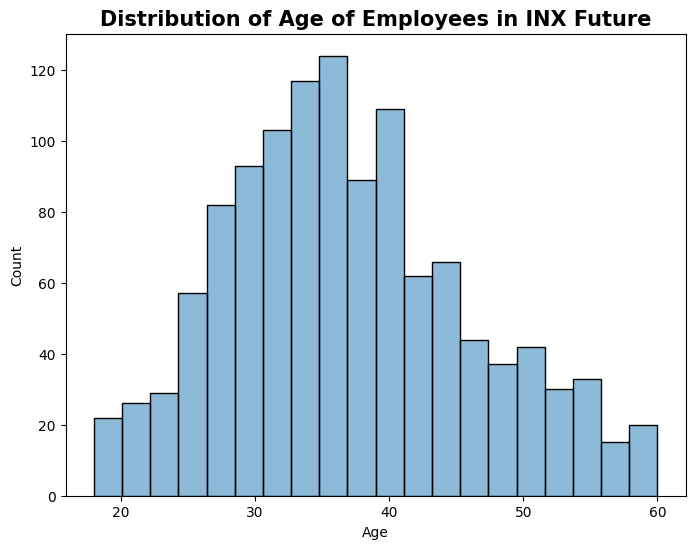

In [10]:
#Histogram

plt.figure(figsize = (8,6))
sns.histplot(data=df, x='Age', edgecolor='black', bins=20, alpha=0.5, palette='viridis')
plt.title('Distribution of Age of Employees in INX Future', weight = 'bold', size = 15)
plt.show()

- The distribution of the ages of employees in INX Future Inc is seen to be almost normal with majority of them being between 25 and 45 years.


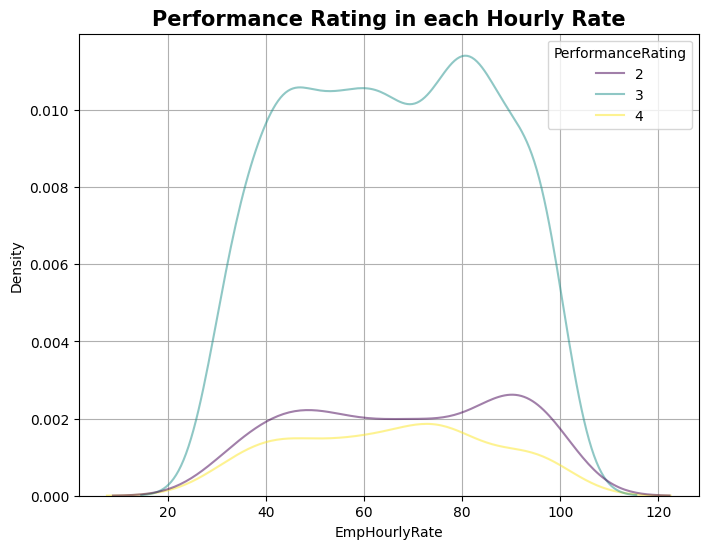

In [11]:
#KDE

plt.figure(figsize = (8,6))
sns.kdeplot(data=df, x='EmpHourlyRate', hue = 'PerformanceRating', palette='viridis', alpha=0.5)
plt.title('Performance Rating in each Hourly Rate', weight = 'bold', size = 15)
plt.grid(True)
plt.show()

- Most employees in INX Future Inc. earn around $40-$90 per hour.
- Also, most employees are seen to have a performance rating of 3.
- Higher performance ratings are not associated with higher hourly rates.

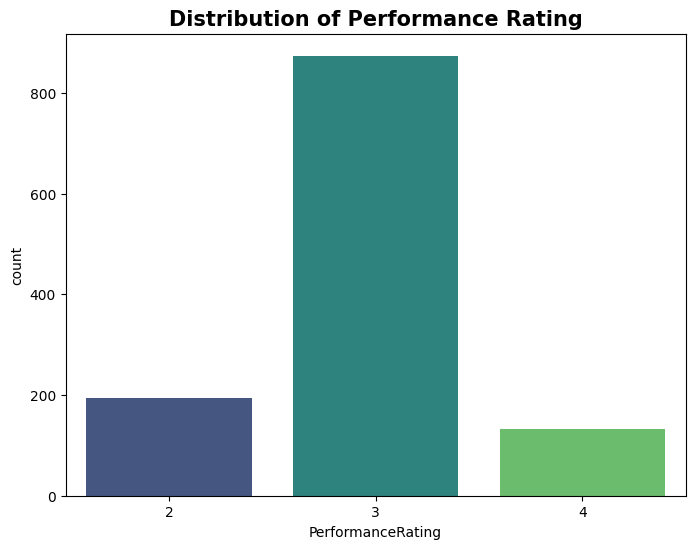

In [12]:
#Countplot (For target variable)

plt.figure(figsize= (8,6))
sns.countplot(x =df['PerformanceRating'], palette='viridis')
plt.title('Distribution of Performance Rating', size = 15, weight = 'bold')
plt.show()

- Most employees (more than 800) are seen to have a performance rating of 3.
- Close to 200 employees are seen to have a performance rating of 2 and those with a performance rating of 4 are less than 150.
- This indicates that most employees have average performances and the least perform above expectation.
- Additionally, there is seen to be a class imbalance in the column.

#### **2. Bivariate Visualizations*

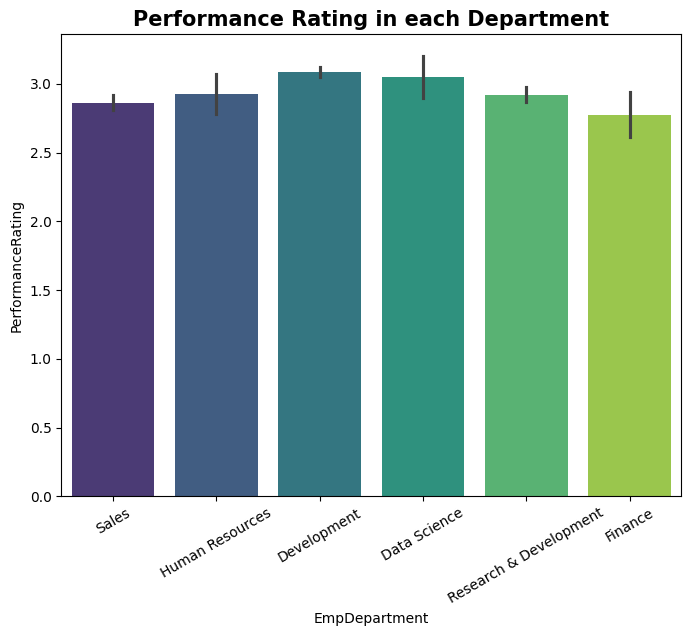

In [13]:
#Barplot

plt.figure(figsize=(8,6))
sns.barplot(data = df, x = df['EmpDepartment'], y = df['PerformanceRating'], palette='viridis')
plt.title('Performance Rating in each Department', weight='bold', size=15)
plt.xlabel('EmpDepartment', size = 10)
plt.ylabel('PerformanceRating', size = 10)
plt.xticks(rotation = 30)
plt.show()

- Each of the departments are seen to have about the same performance scores. Specifically, the Development and Data Science departments have the highest performance scores (approximately 3) while the finance department is seen to have the lowest performance scores at 2.8.

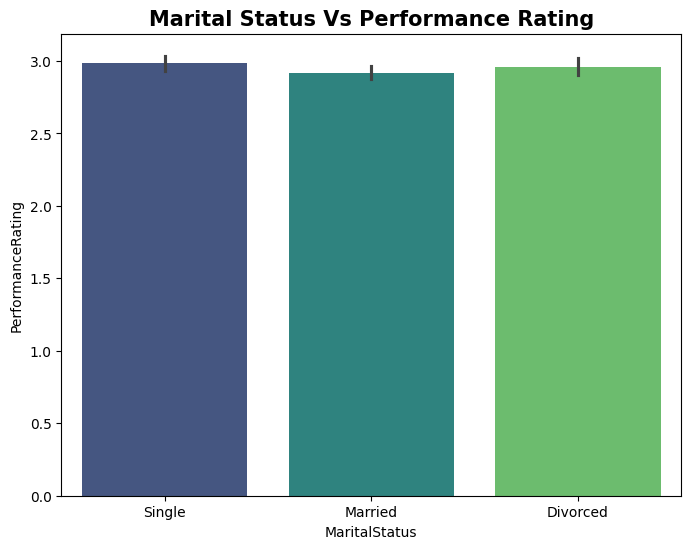

In [14]:
#Barplot

plt.figure(figsize=(8,6))
sns.barplot(data = df, x = df['MaritalStatus'], y = df['PerformanceRating'], palette='viridis')
plt.title('Marital Status Vs Performance Rating', weight='bold', size=15)
plt.xlabel('MaritalStatus', size = 10)
plt.ylabel('PerformanceRating', size = 10)
plt.show()

- The marital status of individuals in the organization does not affect their performances as they all seem to be about the same at 3.

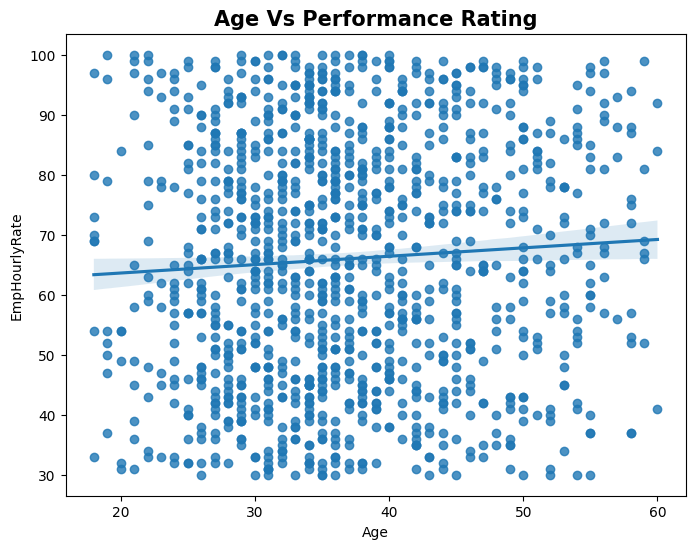

In [15]:
#Regression Plot

plt.figure(figsize=(8,6))
sns.regplot(data = df, x = 'Age', y = 'EmpHourlyRate')
plt.title('Age Vs Performance Rating', size = 15, weight = 'bold')
plt.show()

- There is no correlation between age and employee performance as seen in the regression plot above, given the nature of the trendline.

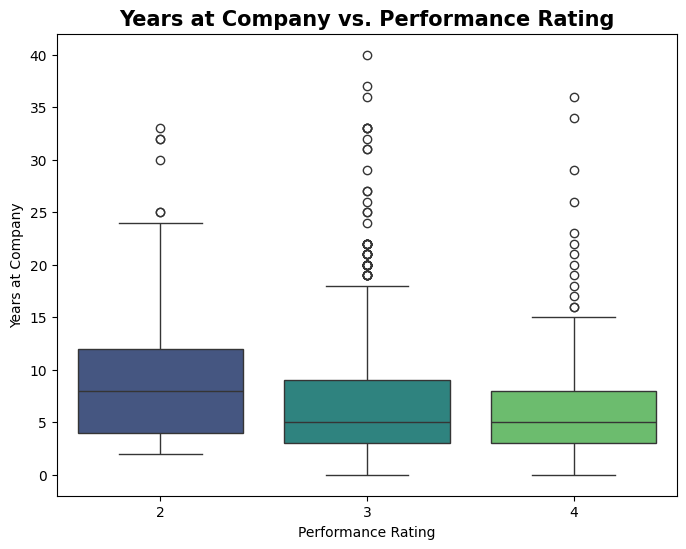

In [16]:
#Boxplot

plt.figure(figsize=(8,6))
sns.boxplot(x=df["PerformanceRating"], y=df["ExperienceYearsAtThisCompany"], palette="viridis")
plt.xlabel("Performance Rating")
plt.ylabel("Years at Company")
plt.title("Years at Company vs. Performance Rating", weight = 'bold', size = 15)
plt.show()

- Experience at Inx Future Inc. alone may not directly correlate with employee performance, as there are high-tenure employees with low ratings.

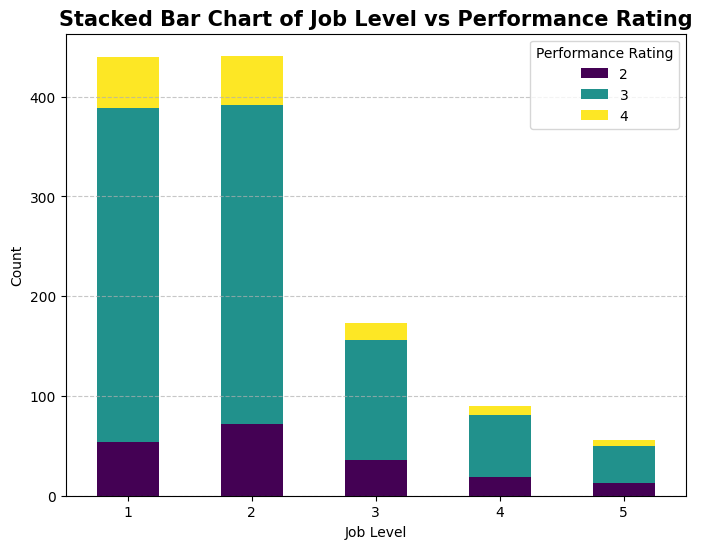

In [17]:
#Stacked Bar Chart

df.groupby(["EmpJobLevel", "PerformanceRating"]).size().unstack().plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,6))

plt.title("Stacked Bar Chart of Job Level vs Performance Rating", size = 15, weight = 'bold')
plt.xlabel("Job Level")
plt.ylabel("Count")
plt.legend(title="Performance Rating")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

-  Lower-level employees in INX Future Inc. perform at similar levels to those in higher levels.

#### **3. Multivariate Visualizations*

In [18]:
#3D Scatter plot

fig = px.scatter_3d(df, x="TotalWorkExperienceInYears", y="EmpJobLevel", z="EmpLastSalaryHikePercent",color="PerformanceRating", color_continuous_scale="Viridis",size_max=15, opacity= 0.8)

fig.update_layout(
    title="Enhanced 3D Scatter Plot of Job Level, Experience & Salary Hike",
    scene=dict(
        xaxis_title="Total Work Experience (Years)",
        yaxis_title="Job Level",
        zaxis_title="Salary Hike (%)",
        xaxis=dict(showgrid=True, gridcolor="lightgrey"),
        yaxis=dict(showgrid=True, gridcolor="lightgrey"),
        zaxis=dict(showgrid=True, gridcolor="lightgrey"),
    ),
    coloraxis_colorbar=dict(title="Performance Rating"),
    paper_bgcolor="white"
)

fig.update_traces(marker=dict(size=6, opacity=0.8, line=dict(width=0.5, color="black")))
fig.show()


- Workers with higher salary hikes are seen to have better performances and vice versa.
- Work experience is seen not to directly affect the performance rating of an employee as there are individuals with more than 30 years of experience but with lower ratings.
- The job level of an employee also affects performance but not by itself as employees with higher job levels are likely to have salary hikes, which is seen to correlate with higher performance.

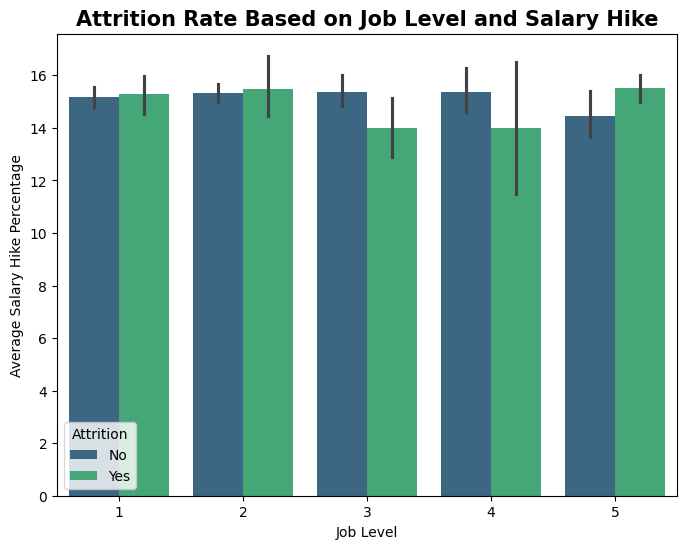

In [19]:
#Clustered Bar chart

plt.figure(figsize=(8,6))
sns.barplot(x="EmpJobLevel", y="EmpLastSalaryHikePercent", hue="Attrition", data=df, palette="viridis")

plt.title("Attrition Rate Based on Job Level and Salary Hike", weight = 'bold', size = 15)
plt.xlabel("Job Level")
plt.ylabel("Average Salary Hike Percentage")
plt.legend(title="Attrition")
plt.show()

 - Salary hikes are seen to not influence employee attrition as the levels are seen to be approximately even in all job levels.

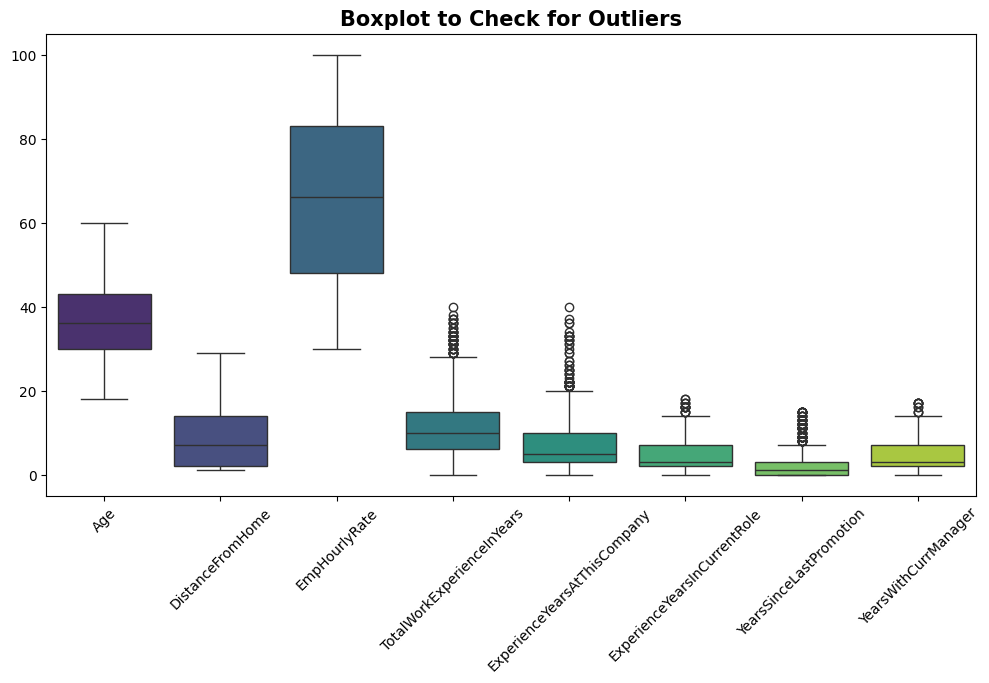

In [20]:
#Box plot for continous variables to check for outliers

columns = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


plt.figure(figsize = (12,6))
sns.boxplot(df[columns], palette='viridis')
plt.title('Boxplot to Check for Outliers', size = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

- Since the outiers in some of the columns are not seen to be due to error inputs, i.e they are genuine values and provide useful insights, they will not be dropped.
- Additionally, given the small size of the dataste (1200 rows), there will be no need to reduce the values which will ensure better model development.

In [21]:
#Label Encoding the categorical columns for the correlation Heatmap

le = LabelEncoder()

#cols = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

df['Gender_encoded'] = le.fit_transform(df['Gender'])
df['EducationBackground_encoded'] = le.fit_transform(df['EducationBackground'])
df['MaritalStatus_encoded'] = le.fit_transform(df['MaritalStatus'])
df['EmpDepartment_encoded'] = le.fit_transform(df['EmpDepartment'])
df['EmpJobRole_encoded'] = le.fit_transform(df['EmpJobRole'])
df['BusinessTravelFrequency_encoded'] = le.fit_transform(df['BusinessTravelFrequency'])
df['OverTime_encoded'] = le.fit_transform(df['OverTime'])
df['Attrition_encoded'] = le.fit_transform(df['Attrition'])

df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,Attrition,PerformanceRating,Gender_encoded,EducationBackground_encoded,MaritalStatus_encoded,EmpDepartment_encoded,EmpJobRole_encoded,BusinessTravelFrequency_encoded,OverTime_encoded,Attrition_encoded
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,No,3,1,2,2,5,13,2,0,0
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,No,3,1,2,2,5,13,2,0,0
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,No,4,1,1,1,5,13,1,1,0
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,No,3,1,0,0,3,8,2,0,0
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,No,3,1,2,2,5,13,2,0,0


- All the columns with 'object' data type have been encoded to integer data type.

In [22]:
#Categorical Mapping of the encoded columns

a=df['Gender'].unique()
b=df['EducationBackground'].unique()
c=df['MaritalStatus'].unique()
d=df['EmpDepartment'].unique()
e=df['EmpJobRole'].unique()
f=df['BusinessTravelFrequency'].unique()
g=df['OverTime'].unique()
h=df['Attrition'].unique()

category_mapping_Gender = {category : i for i, category in enumerate(a)}
category_mapping_EducationBackground = {category : i for i, category in enumerate(b)}
category_mapping_MaritalStatus = {category : i for i, category in enumerate(c)}
category_mapping_EmpDepartment = {category : i for i, category in enumerate(d)}
category_mapping_EmpJobRole = {category : i for i, category in enumerate(e)}
category_mapping_BusinessTravelFrequency = {category : i for i, category in enumerate(f)}
category_mapping_OverTime = {category : i for i, category in enumerate(g)}
category_mapping_Attrition = {category : i for i, category in enumerate(h)}

print('category_mapping_Gender:', category_mapping_Gender)
print('\ncategory_mapping_EducationBackground:', category_mapping_EducationBackground)
print('\ncategory_mapping_MaritalStatus:', category_mapping_MaritalStatus)
print('\ncategory_mapping_EmpDepartment:', category_mapping_EmpDepartment)
print('\ncategory_mapping_EmpJobRole:', category_mapping_EmpJobRole)
print('\ncategory_mapping_BusinessTravelFrequency:', category_mapping_BusinessTravelFrequency)
print('\ncategory_mapping_OverTime:', category_mapping_OverTime)
print('\ncategory_mapping_Attrition:', category_mapping_Attrition)

category_mapping_Gender: {'Male': 0, 'Female': 1}

category_mapping_EducationBackground: {'Marketing': 0, 'Life Sciences': 1, 'Human Resources': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}

category_mapping_MaritalStatus: {'Single': 0, 'Married': 1, 'Divorced': 2}

category_mapping_EmpDepartment: {'Sales': 0, 'Human Resources': 1, 'Development': 2, 'Data Science': 3, 'Research & Development': 4, 'Finance': 5}

category_mapping_EmpJobRole: {'Sales Executive': 0, 'Manager': 1, 'Developer': 2, 'Sales Representative': 3, 'Human Resources': 4, 'Senior Developer': 5, 'Data Scientist': 6, 'Senior Manager R&D': 7, 'Laboratory Technician': 8, 'Manufacturing Director': 9, 'Research Scientist': 10, 'Healthcare Representative': 11, 'Research Director': 12, 'Manager R&D': 13, 'Finance Manager': 14, 'Technical Architect': 15, 'Business Analyst': 16, 'Technical Lead': 17, 'Delivery Manager': 18}

category_mapping_BusinessTravelFrequency: {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Trave

All the categorical columns have been appropriately encoded

In [23]:
#Correlation Matrix and Heatmap

#Dropping unrequired columns
df = df.copy()

df = df.drop(columns=['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'], axis = 1)

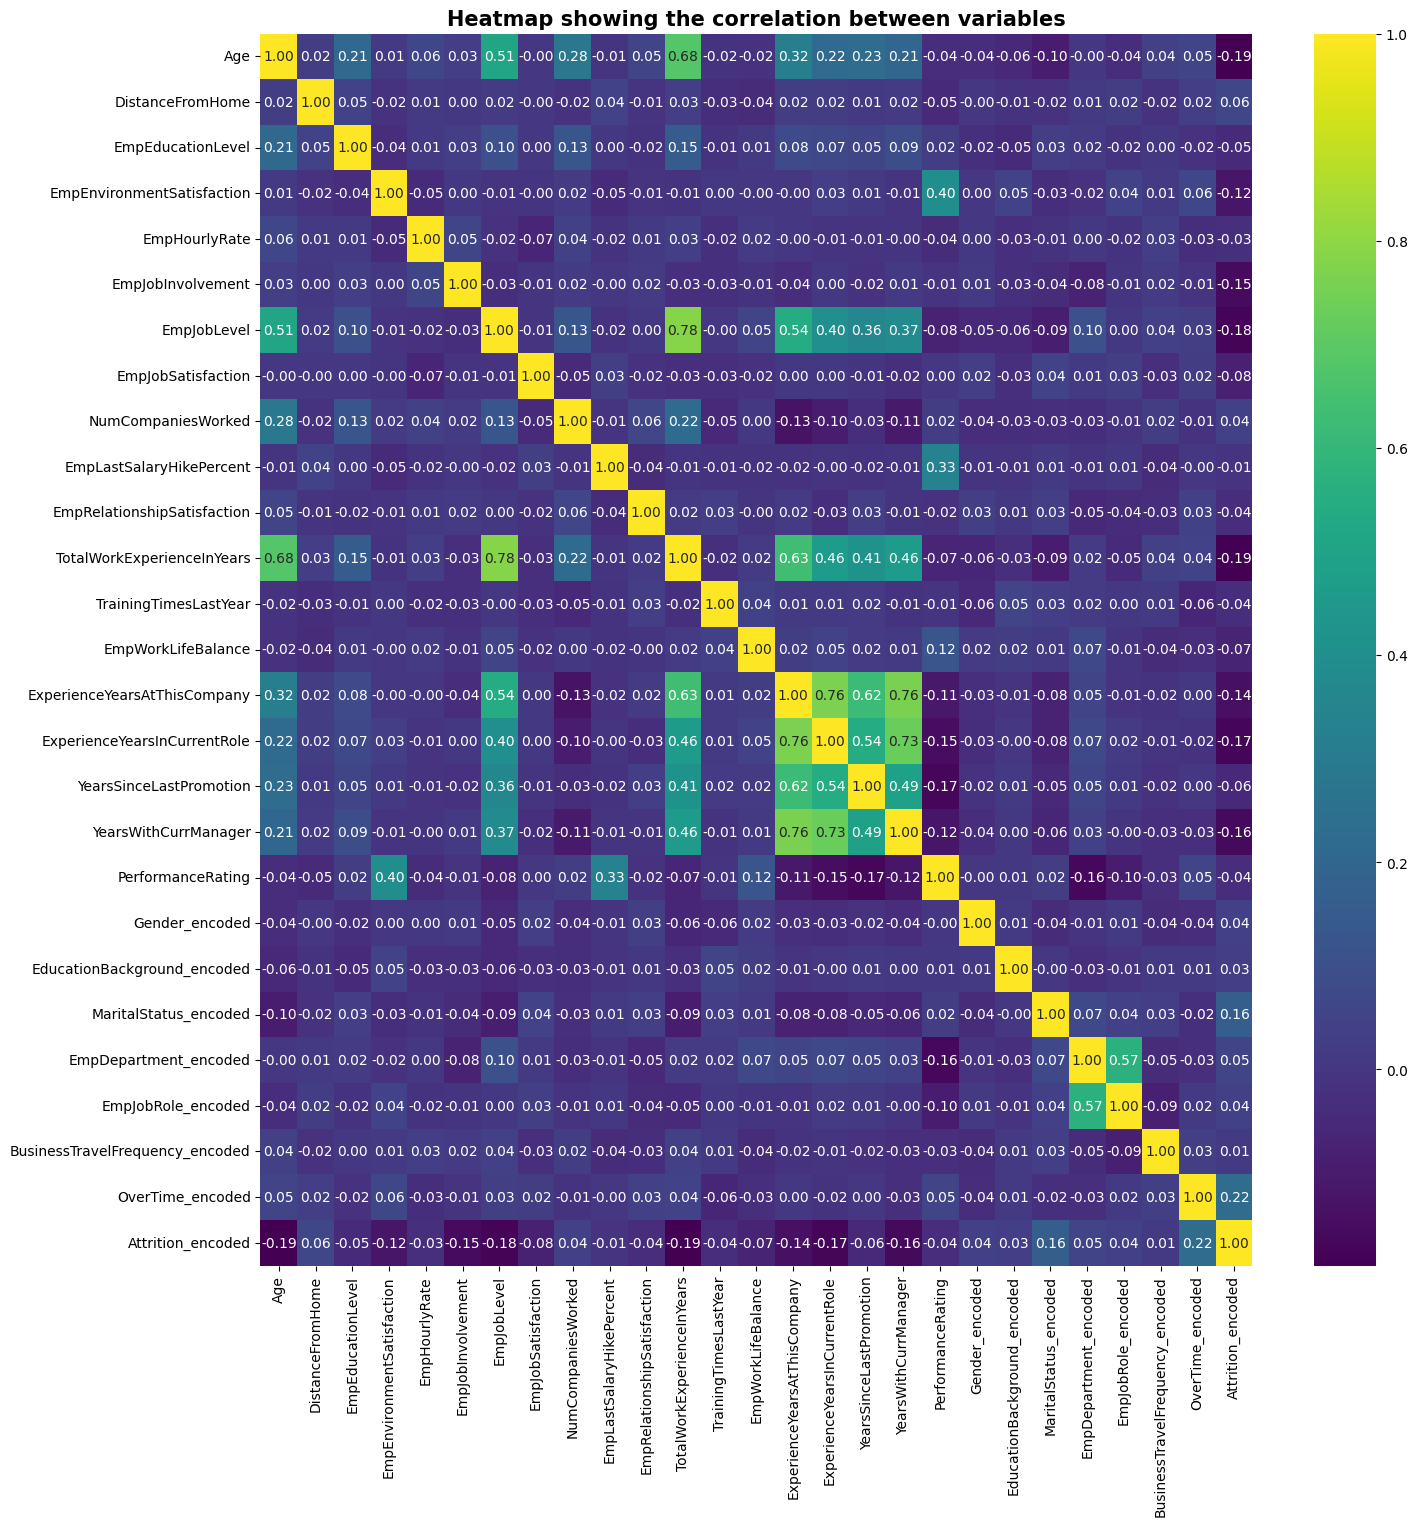

<Figure size 640x480 with 0 Axes>

In [25]:
#Plotting the correlation heatmap

matrix = df.corr()

plt.figure(figsize = (16,16))
sns.heatmap(matrix, cmap= 'viridis', annot = True, fmt = '.2f')
plt.title('Heatmap showing the correlation between variables', size = 15, weight = 'bold')
plt.show()
plt.savefig('correlation_heatmap.jpg')

##### Observations and Insights Obtained from the Heatmap

- Very few variables positively correlate with the employee performance based on the given features.
- Some columns, such as TotalWorkExperienceYears & ExperienceYearsAtThisCompany and TotalWorkExperienceYears & ExperienceYearsInCurrentRole, among others, are seen to have high levels of multi-colinearity, i.e correlation among themselves.
- Additionally, there are some factors that negatively affect the performance of employees. One is years since last promotion, where workers who have not been promoted in a long time tend to perform poorly as seen in the heatmap. An increase in the number of years since last promotion results in a decrease in performance, thus a negative correlation of -0.17.
- Based on the matrix, the following columns will be applied for model development, looking into factors such as high positive correlation to the target variable, multi-colinearity, and relevance to the overall performance of workers.

1. EmpHourlyRate
2. EmpJobInvolvement
3. EmpJobRole_encoded
4. EmpDepartment_encoded
5. EmpEnvironmentSatisfaction
6. EmpLastSalaryHikePercent
7. EmpWorkLifeBalance
8. YearsWithCurrManager
9. EmpJobSatisfaction
10. NumCompaniesWorked
11. TrainingTimesLastYear
12. TotalWorkExperienceInYears
13. ExperienceYearsAtThisCompany
14. ExperienceYearsInCurrentRole
15.  YearsSinceLastPromotion

#### Feature Engineering

In [26]:
X = df[['EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobRole_encoded', 'EmpDepartment_encoded', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance', 'YearsWithCurrManager', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion']]
y = df['PerformanceRating']

#### Splitting the dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Getting the order of features

In [28]:
print(X_train.columns.tolist())

['EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobRole_encoded', 'EmpDepartment_encoded', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance', 'YearsWithCurrManager', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion']


#### Model Development

In [30]:
# Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.54      0.52      0.53        29
           3       0.84      0.92      0.88       184
           4       0.90      0.33      0.49        27

    accuracy                           0.81       240
   macro avg       0.76      0.59      0.63       240
weighted avg       0.81      0.81      0.79       240



**Interpretation of the Logistic Regression Classification report*
- Class 2 (Moderate Performance):
Precision and Recall: 0.52 –  Moderate ability to distinguish this class i.e half of class 2 instances are misclassified. Overall the harmonic mean of the two is average.

- Class 3 (High Performance):
Precision: 0.84 (84% of predicted class 3 labels are correct).
Recall: 0.92 (92% of class 3 instances are correctly identified).
F1-score: 0.88 (strong overall performance).
The high scores are as a result of a high number of instances occuring in this class.

- Class 4 (Moderate Performance):
Precision: 0.90, meaning most predictions for this class are correct.
Recall: 0.33, meaning 67% of true instances were misclassified (model struggles to detect all its class instances).
F1-score: 0.49, suggesting a drop in recall affects the overall f1-score.

In [33]:
#Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.89      0.86      0.88        29
           3       0.94      0.96      0.95       184
           4       0.83      0.74      0.78        27

    accuracy                           0.93       240
   macro avg       0.89      0.85      0.87       240
weighted avg       0.92      0.93      0.92       240



**Interpretation of the Decision Tree Classification report*
- Class 2 (High Performance):
Precision and Recall: 0.78 & 0.86 – High ability to distinguish this class i.e a few of class 2 instances are misclassified. Overall the harmonic mean of the two is high at 0.82.

- Class 3 (High Performance):
Precision: 0.94 (94% of predicted class 3 labels are correct).
Recall: 0.94 (94% of class 3 instances are correctly identified).
F1-score: 0.94 (strong overall performance).
The high scores are as a result of a high number of instances occuring in this class.

- Class 4 (High Performance):
Precision: 0.83, meaning most predictions for this class are correct.
Recall: 0.74, meaning 26% of true instances were misclassified.
F1-score: 0.78, suggesting a drop in precision affects overall performance, but overally high.

In [44]:
#Random Forest Classifier Model

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.96      0.90      0.93        29
           3       0.95      0.99      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.97      0.88      0.92       240
weighted avg       0.96      0.95      0.95       240



**Interpretation of the Random Forest Classification report*
- Class 2 (Very Hight Performance, better than Logistic and Decision Tree classifiers):
Precision and Recall: 0.96 & 0.93 – Excellent ability to distinguish this class. Overall the harmonic mean of the two is very high at 0.95 despite the low support.

- Class 3 (Very High Performance):
Precision: 0.95 (95% of predicted class 3 labels are correct).
Recall: 0.99 (99% of class 3 instances are correctly identified).
F1-score: 0.97 (Very strong overall performance).

- Class 4 (High Performance):
Precision: 1.00, meaning all predictions for this class are correct.
Recall: 0.74, meaning only 26% of true instances were misclassified.
F1-score: 0.85, suggesting a drop in precision affects overall performance, but still overally high.

In [45]:
#Performing SMOTE to help with the class imbalance

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
rf_resampled = RandomForestClassifier(random_state=42)
rf_resampled.fit(X_resampled, y_resampled)
y_pred = rf_resampled.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.90      0.93      0.92        29
           3       0.95      0.96      0.95       184
           4       0.80      0.74      0.77        27

    accuracy                           0.93       240
   macro avg       0.88      0.88      0.88       240
weighted avg       0.93      0.93      0.93       240



- After performing smote technique, the model's F1 score of all classes sightly reduced to 0.93, 0.96 and 0.78 for classes 2, 3, and 4 respectively.
- Overall, the smote technique did not assist that much in improving the overall peeformance of the model.

In [ ]:
# #Hyperparameter tuning of the Random Forest Model

# #Defining the parameter distributions
# param_distributions = {
#     'criterion': ['gini', 'entropy'],
#     'n_estimators' :[50,100,200],
#     'max_depth' : [2,5,10,None],
#     'min_samples_split': [2,5,10]
# }

# #Initializing RandomSearchCV

# random_search_rf = RandomizedSearchCV(
#     estimator=rf_resampled,
#     param_distributions=param_distributions,
#     n_iter=20,
#     cv=5,
#     scoring='f1_macro',
#     n_jobs=-1,
#     verbose=2,
#     random_state=42
# )

# random_search_rf.fit(X_resampled, y_resampled)
# print('Best Parameters:', random_search_rf.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None, 'criterion': 'gini'}


In [46]:
#Applying the parameters to the rf model

rf_tuned = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_depth=None, criterion='gini')

rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.93      0.93      0.93        29
           3       0.95      0.99      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.96      0.89      0.92       240
weighted avg       0.96      0.95      0.95       240



- After performing hyperparameter tuning, the RF model's F1-Score slightly reduced to 0.93 and 0.83 for classes 2 and 4 respectively, while class 3 remained. This is in comparison to the original Random Forest Model with no SMOTE technique.  

In [47]:
# Gradient Boosting Model

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.93      0.90      0.91        29
           3       0.95      0.97      0.96       184
           4       0.88      0.78      0.82        27

    accuracy                           0.94       240
   macro avg       0.92      0.88      0.90       240
weighted avg       0.94      0.94      0.94       240



**Interpretation of the Gradient Boosting Classification report*
- Class 2 (Very High Performance):
Precision and Recall: 0.93 & 0.90 – High ability to distinguish this class i.e most of class 2 instances are correctly classified. Overall the harmonic mean of the two metrics is very high at 0.91.

- Class 3 (Very High Performance):
Precision: 0.95 (95% of predicted class 3 labels are correct).
Recall: 0.97 (97% of class 3 instances are correctly identified).
F1-score: 0.96 (strong overall performance).

- Class 4 (High Performance):
Precision: 0.83, meaning 83% predictions for this class are correct.
Recall: 0.74, meaning 26% of true instances were misclassified (model struggles to detect all some class instances).
F1-score: 0.78, suggesting a drop in precision affects overall performance, but still overally high.

In [48]:
#Performing SMOTE to help with the class imbalance

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
gb_sampled = GradientBoostingClassifier()
gb_sampled.fit(X_resampled, y_resampled)
y_pred = gb_sampled.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.93      0.90      0.91        29
           3       0.95      0.97      0.96       184
           4       0.83      0.74      0.78        27

    accuracy                           0.93       240
   macro avg       0.90      0.87      0.88       240
weighted avg       0.93      0.93      0.93       240



- After conducting the SMOTE technique on the gradient boosting model, the f1 scores of class 2 and 3 reduced to 0.90 and 0.95, while that of class 4 remained the same.
- Therefore, this technique has not proved helpful in enhancing the model.

In [ ]:
# #Tuning the hyperparameters of the Gradient Boosting model.

# param_grid_gb = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'min_samples_split' : [2,5,10],
#     'max_depth': [3,5,10,None],
#     'min_samples_leaf': [1,2,4]
# }

# grid_search_gb = GridSearchCV(
#     estimator=gb_sampled,
#     param_grid=param_grid_gb,
#     cv = 5,
#     scoring='f1_macro',
#     n_jobs=-1,
#     verbose=2
# )

# grid_search_gb.fit(X_resampled, y_resampled)
# best_params_gb = grid_search_gb.best_params_
# print('Best Parameters GB', best_params_gb)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters GB {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [49]:
#Applying the hyperparameters

gb_tuned = GradientBoostingClassifier(n_estimators =100 , learning_rate=0.2 , min_samples_split=10 , max_depth=10 , min_samples_leaf=2)
gb_tuned.fit(X_resampled, y_resampled)
y_pred = gb_tuned.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.90      0.90      0.90        29
           3       0.95      0.96      0.95       184
           4       0.80      0.74      0.77        27

    accuracy                           0.93       240
   macro avg       0.88      0.86      0.87       240
weighted avg       0.92      0.93      0.92       240



- After performing hyperparameter tuning, the Gradient Boosting model's F1-Score slightly reduced in all classes.

In [50]:
#Support Vector Machine Classifier Model

svm = SVC()
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        29
           3       0.77      1.00      0.87       184
           4       0.00      0.00      0.00        27

    accuracy                           0.77       240
   macro avg       0.26      0.33      0.29       240
weighted avg       0.59      0.77      0.67       240



**Interpretation of the SVM Classification report*
- Class 2 (Average Performance):
Precision and Recall: 0.00 – all of class 2 instances are misclassified.

- Class 3 (High Performance):
Precision: 0.77 (77% of predicted class 3 labels are correct).
Recall: 1.00 (all of class 3 instances are correctly identified).
F1-score: 0.87 (strong overall performance).

- Class 4 (High Performance):
Precision and Recall: 0.00 – all of class 4 instances are misclassified

In [51]:
#Applying SMOTE

svm = SVC()
svm.fit(X_resampled, y_resampled)
y_pred = svm.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.26      0.48      0.34        29
           3       0.93      0.63      0.75       184
           4       0.33      0.74      0.45        27

    accuracy                           0.62       240
   macro avg       0.51      0.62      0.51       240
weighted avg       0.78      0.62      0.67       240



- After conducting the SMOTE technique on the SVM model, the f1 scores of class 2 and 3 increased to 0.34 & 0.45 respectively, while that of class 2 reduced to 0.75.
- Therefore, this technique has not proved helpful in enhancing the model.

In [ ]:
# #Hyperparameter Tuning

# param_distributions_svm = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
#     'degree': [2, 3, 4]
# }

# random_search_svm = RandomizedSearchCV(
#     estimator=svm,
#     param_distributions=param_distributions_svm,
#     n_jobs=-1,
#     cv=5,
#     verbose=2,
#     scoring = 'f1_micro',
#     n_iter=20,
#     random_state=42
# )

# svmm = random_search_svm.fit(X_resampled, y_resampled)
# best_params_svm = svmm.best_params_
# print('Best Parameters XG:', best_params_svm)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Best Parameters XG: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 1}


In [52]:
#Applying the hyper parameters

svm_tuned = SVC(C = 1, kernel =  'rbf', gamma = 'auto', degree= 2)
svm_tuned.fit(X_resampled, y_resampled)
y_predict = svm_tuned.predict(X_test)
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           2       0.60      0.10      0.18        29
           3       0.78      0.98      0.87       184
           4       0.33      0.04      0.07        27

    accuracy                           0.77       240
   macro avg       0.57      0.37      0.37       240
weighted avg       0.71      0.77      0.70       240



- Generally, hyperparameter tuning did not prove to be useful in improving the SVM model's performance to better f1-score levels similar to that of Gradient Boosting and Random Forest classifiers.

#### Model Selection

Due to the exemplary performance of the Random Forest Model (untuned and smote not applied), with f1 scores of 0.95, 0.97, and 0.85 in classes 2,3, and 4 respectively, I have decided to proceed with it and use it in my application development. Also, the model is seen to perform better than the other models, based on the 15 features that have been selected.  

#### Model Saving

In [54]:
joblib.dump(rf, 'RF_model.pkl')
print('Model has been saved sucessfully')

Model has been saved sucessfully


#### Feature Importance

In [56]:
#Creating the Feature Importance Dataframe

features = X.columns
importances = rf.feature_importances_

fe_df = pd.DataFrame(
    {
        'Feature': features,
        'Importance': importances
    }
).sort_values(by = 'Importance', ascending=False)

fe_df

,Feature,Importance
4,EmpEnvironmentSatisfaction,0.229225
5,EmpLastSalaryHikePercent,0.225003
14,YearsSinceLastPromotion,0.101172
2,EmpJobRole_encoded,0.053333
0,EmpHourlyRate,0.053190
13,ExperienceYearsInCurrentRole,0.047848
12,ExperienceYearsAtThisCompany,0.045656
11,TotalWorkExperienceInYears,0.040983
3,EmpDepartment_encoded,0.040031
6,EmpWorkLifeBalance,0.037531


- These are the most important features arranged from the most important to the least.

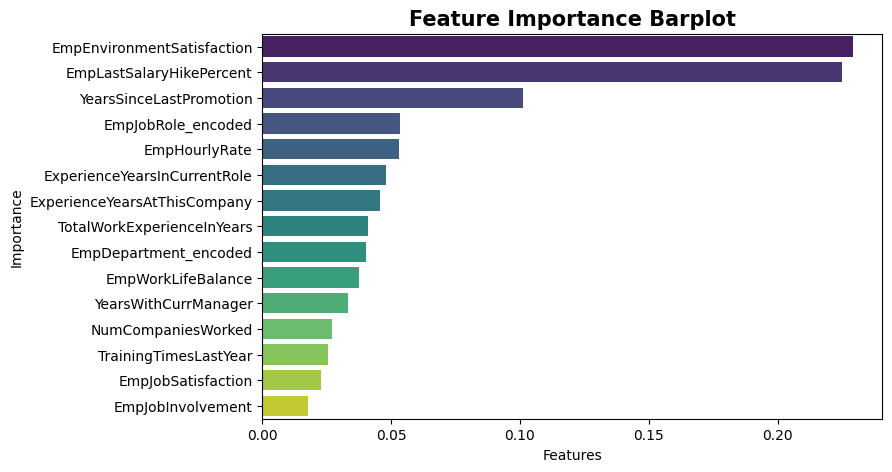

In [57]:
# Visualizing the feature importances using a barplot

plt.figure(figsize = (8,5))
sns.barplot(data = fe_df, x='Importance', y='Feature', palette = 'viridis')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Barplot', size = 15, weight = 'bold')
plt.show()

#### **Insights from the Feature importance barplot*

- Employee Environment Satisfaction is seen to be the most important feature affecting the performance of workers in Inx Future Inc at 0.24. This shows that a positive work environment enhances employee morale and satisfaction.
- This is followed closely by Employee last salary hike percent at 0.22. From common knowledge, workers who get salary hikes are more likely to perform better than those who do not.
- Years since last promotion is also seen as an important factor in determining the level of performance of an employee since inidividials who experience promotions are likely to have high morale in their works.
- An employees job role is also seen to be a significant factor in determining the performance of an employee. This is because some roles my need high technical expertise that may impact the performance of an employee.
- Work experience is also an important factor in determining the performance of an employee as individuals with more years of experience tend to comprehend how certain tasks as done, thus they are more efficient in performing their duties. An experieced employee is likely to perform better than an intern.
- Work life balance also affects the performance of an employee as those with a good balance will likely not experience fatigue and exhaustion easily, making them more efficient.
- Training employees also enhances their performance as those who are often trained always outperform those with little to no training.
- Employee Job Involvement is seen to the the least important feature affecting employee performance at 0.02. It shows that their level of involvement in their duties does not directly affect their performance scores.

#### **Recommendations to improve employee performance*

- There should be performance-based salary hikes among employees of Inx Future Inc. This is because higher salary hikes tend to motivate workers to perform better.
- The management should also identify individuals with fewer years of experience but perform better and consider them for salary hikes and promotions which will ensure better performance and, ultimately a better performing organization.
- The workplace conditions should be enhanced to ensure it is made ideal for employees to work in. This can be done by conducting surveys among employees to understand various concerns regarding the work environment. Activities such as internal social events can be organizaed to enhance cohesiveness among employees, which will ultimately lead to better performance.
- The management can also conduct skill assessments among employees within Inx Future Inc to ensure that every individual is within their area of expertise, since job role a plays a big role in employees' overall performance rating.